Data preparation

##Import Labraries and load the Data

In [1]:
#Import Libraries & Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os
import zipfile

# Install Kaggle if necessary (you already have it installed, so you can skip this step)
# !pip install kaggle

# Make sure 'kaggle.json' is in the appropriate folder for authentication (this step assumes you have done this)
# In Windows, the correct place for kaggle.json would be C:\Users\<your-username>\.kaggle\kaggle.json

# Download the dataset from Kaggle using the Kaggle API (you've mentioned a more recent copy already exists)
!kaggle datasets download -d imakash3011/customer-personality-analysis --force

# Unzip the downloaded dataset using Python's zipfile module
zip_path = 'customer-personality-analysis.zip'
extract_path = './datasets'

# Ensure the datasets directory exists
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load the dataset into a Pandas DataFrame
path = os.path.join(extract_path, 'marketing_campaign.csv')

# Verify if the file exists before reading
if os.path.exists(path):
    df = pd.read_csv(path, sep='\t')
    print("Dataset loaded successfully!")
else:
    print(f"Error: The file {path} does not exist.")

# Display the dataset path
print("Path to dataset files:", os.path.abspath(path))

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 9.89MB/s]
Dataset loaded successfully!
Path to dataset files: /content/datasets/marketing_campaign.csv


##Data Inspection

In [2]:
df.head()
# After loading the dataset
if os.path.exists(path):
    df = pd.read_csv(path, sep='\t')
    print("Dataset loaded successfully!")

    # Display the first 5 rows of the dataset
    print(df.head())

    # Display the structure of the dataset
    print(df.info())

    # Display the shape of the dataset
    print(f"Dataset shape: {df.shape}")
else:
    print(f"Error: The file {path} does not exist.")


Dataset loaded successfully!
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Check for missing values in the dataset
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [6]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicate rows if any
df_cleaned = df.drop_duplicates()


0


# Explore Data Analysis

In [7]:
# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df["Dt_Customer"].head()

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


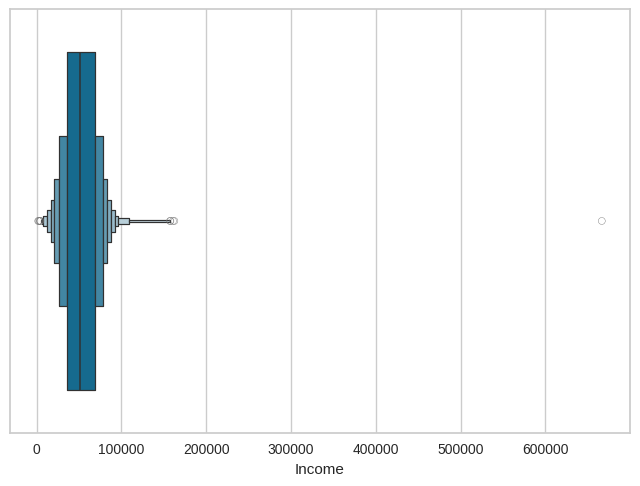

In [9]:
sns.boxenplot(x=df['Income']);


In [10]:
# Find IQR for 'Income' and remove outliers
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Income'] >= lower_limit) & (df['Income'] <= upper_limit)]


In [11]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns to scale
cols_to_scale = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Apply the scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [12]:
# Create a new column 'TotalChildren' by adding 'Kidhome' and 'Teenhome'
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
# Perform one-hot encoding on 'Education' and 'Marital_Status'
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalChildren
0,5524,1957,Graduation,Single,0.084832,0,0,2012-09-04,0.585859,0.425318,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,0.067095,1,1,2014-03-08,0.383838,0.007368,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,0.105097,0,0,2013-08-21,0.262626,0.285332,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,0.037471,1,0,2014-02-10,0.262626,0.007368,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,0.085065,1,0,2014-01-19,0.949495,0.115874,...,0,0,0,0,0,0,3,11,0,1


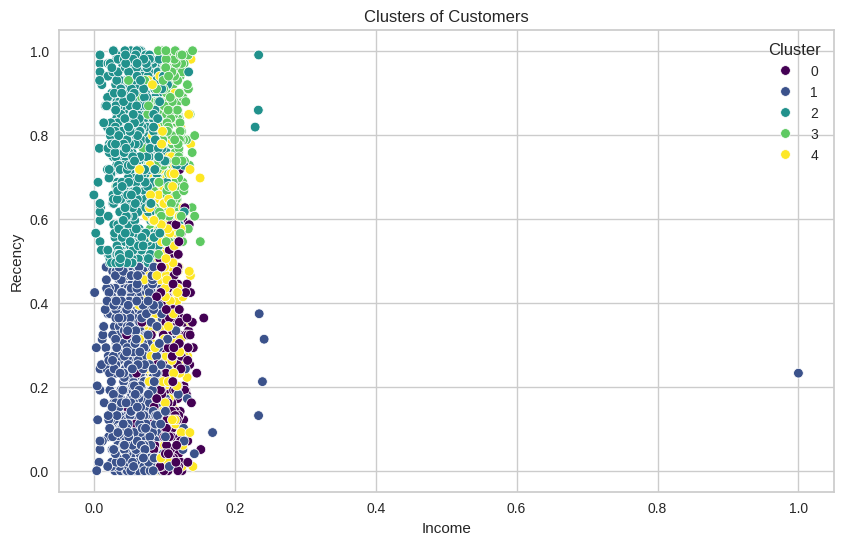

In [14]:
# Drop rows with missing values and create a deep copy to avoid SettingWithCopyWarning
df_cleaned = df.dropna().copy()

# Now run KMeans clustering with explicit n_init and use .loc[] safely
X = df_cleaned[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Set n_init explicitly to suppress the FutureWarning
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Income'], y=df_cleaned['Recency'], hue=df_cleaned['Cluster'], palette='viridis')
plt.title('Clusters of Customers')
plt.show()



In [15]:
# Save the cleaned dataset
df_cleaned.to_csv('cleaned_marketing_campaign.csv', index=False)

Feature Engineering

In [16]:
# Calculate total spending
df_cleaned['TotalSpending'] = df_cleaned['MntWines'] + df_cleaned['MntFruits'] + df_cleaned['MntMeatProducts'] + df_cleaned['MntFishProducts'] + df_cleaned['MntSweetProducts'] + df_cleaned['MntGoldProds']

# Calculate proportion of spending in each category
for category in ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']:
    df_cleaned[f'SpendingProp_{category}'] = df_cleaned[f'Mnt{category}'] / df_cleaned['TotalSpending']

In [17]:
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,TotalChildren,Cluster,TotalSpending,SpendingProp_Wines,SpendingProp_Fruits,SpendingProp_MeatProducts,SpendingProp_FishProducts,SpendingProp_SweetProducts,SpendingProp_GoldProds
0,5524,1957,Graduation,Single,0.084832,0,0,2012-09-04,0.585859,0.425318,...,1,0,3,2.425838,0.175328,0.182292,0.130479,0.273758,0.137932,0.100210
1,2174,1954,Graduation,Single,0.067095,1,1,2014-03-08,0.383838,0.007368,...,0,2,1,0.043970,0.167562,0.114285,0.079105,0.175620,0.086474,0.376952
2,4141,1965,Graduation,Together,0.105097,0,0,2013-08-21,0.262626,0.285332,...,0,0,0,1.229627,0.232047,0.200249,0.059874,0.348538,0.064937,0.094355
3,6182,1984,Graduation,Together,0.037471,1,0,2014-02-10,0.262626,0.007368,...,0,1,1,0.102891,0.071607,0.195356,0.112684,0.375250,0.110863,0.134240
4,5324,1981,PhD,Married,0.085065,1,0,2014-01-19,0.949495,0.115874,...,0,1,2,0.722065,0.160476,0.299254,0.094736,0.245970,0.142178,0.057386


In [18]:
# Select relevant features for clustering
features = ['Income', 'Recency', 'TotalSpending', 'SpendingProp_Wines',
            'SpendingProp_Fruits', 'SpendingProp_MeatProducts',
            'SpendingProp_FishProducts', 'SpendingProp_SweetProducts',
            'SpendingProp_GoldProds', 'TotalChildren']
X = df_cleaned[features]

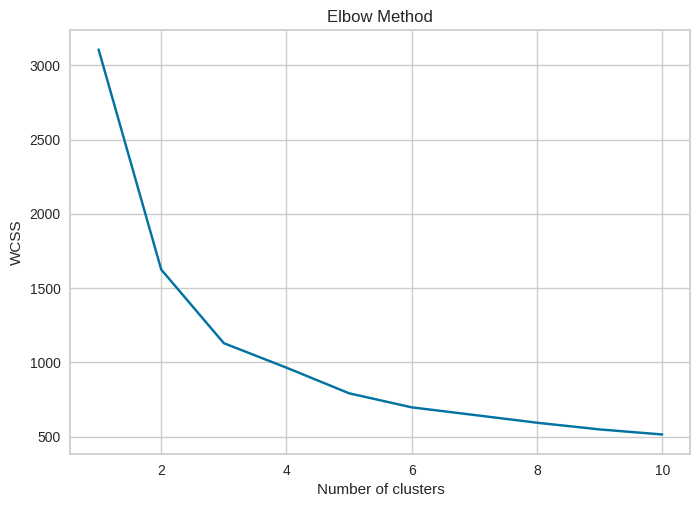

In [19]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Group data by cluster and calculate the mean of relevant features
cluster_means = df_cleaned.groupby('Cluster')[features].mean()

# Display the cluster means
print(cluster_means)

           Income   Recency  TotalSpending  SpendingProp_Wines  \
Cluster                                                          
0        0.063348  0.488791       0.407347            0.287284   
1        0.109484  0.500761       1.988104            0.226968   
2        0.064679  0.503265       0.295066            0.339162   
3        0.071012  0.491236       0.637312            0.198404   

         SpendingProp_Fruits  SpendingProp_MeatProducts  \
Cluster                                                   
0                   0.130220                   0.097857   
1                   0.183531                   0.129189   
2                   0.098775                   0.108879   
3                   0.163832                   0.116654   

         SpendingProp_FishProducts  SpendingProp_SweetProducts  \
Cluster                                                          
0                         0.148170                    0.101695   
1                         0.199939                

In [20]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)  # Assuming 4 clusters based on the Elbow method
df_cleaned['Cluster'] = kmeans.fit_predict(X)

In [21]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_cleaned[['Cluster']]], axis=1)
fig = px.scatter(finalDf, x="principal component 1", y="principal component 2", color="Cluster")
fig.show()

In [23]:
# Calculate the silhouette score
score = silhouette_score(X, df_cleaned['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3682725388808029


In [24]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
df_cleaned['Cluster_Agg'] = agg_clustering.fit_predict(X)

# Calculate silhouette score for Agglomerative Clustering
score_agg = silhouette_score(X, df_cleaned['Cluster_Agg'])
print(f"Silhouette Score (Agglomerative): {score_agg}")

Silhouette Score (Agglomerative): 0.3497622397380766


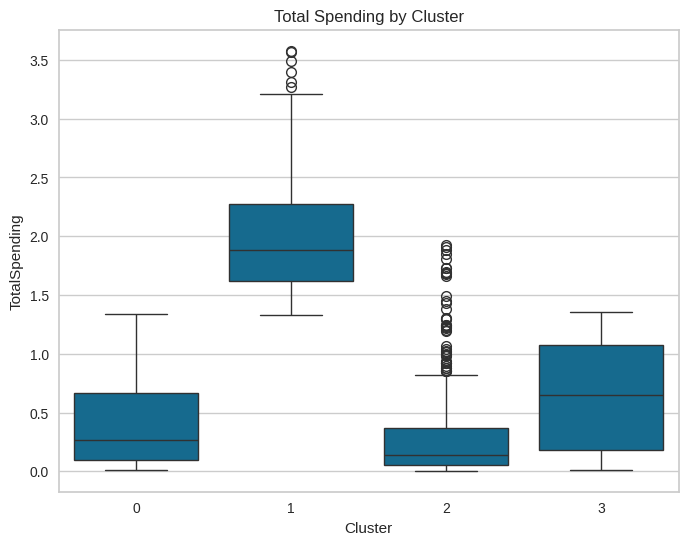

In [25]:
# Visualize cluster differences in TotalSpending using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='TotalSpending', data=df_cleaned)
plt.title('Total Spending by Cluster')
plt.show()